# 🏠 **Housing Price Prediction**

## **ML Internship Project(03)**
**Dataset:** California Housing Prices  
**Goal:** Predict `median_house_value` using various features  
**Steps:** Load → Explore → Visualize → Preprocess → Train → Evaluate

In [1]:
# All the tools we need for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')
sns.set_palette('husl')

# **Load Data**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Explore Data**

In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# **Visualize Data**

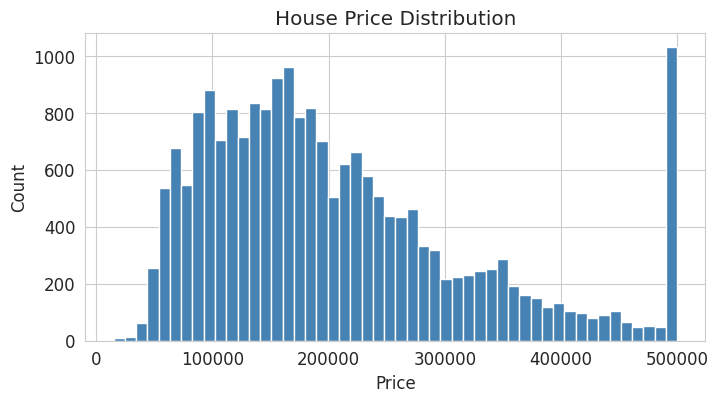

In [10]:
df['median_house_value'].hist(bins=50, color='steelblue', edgecolor='white', figsize=(8,4))
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# BoxPLot Visualization of the different Features

/tmp/ipython-input-4265171028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', palette='Set2')


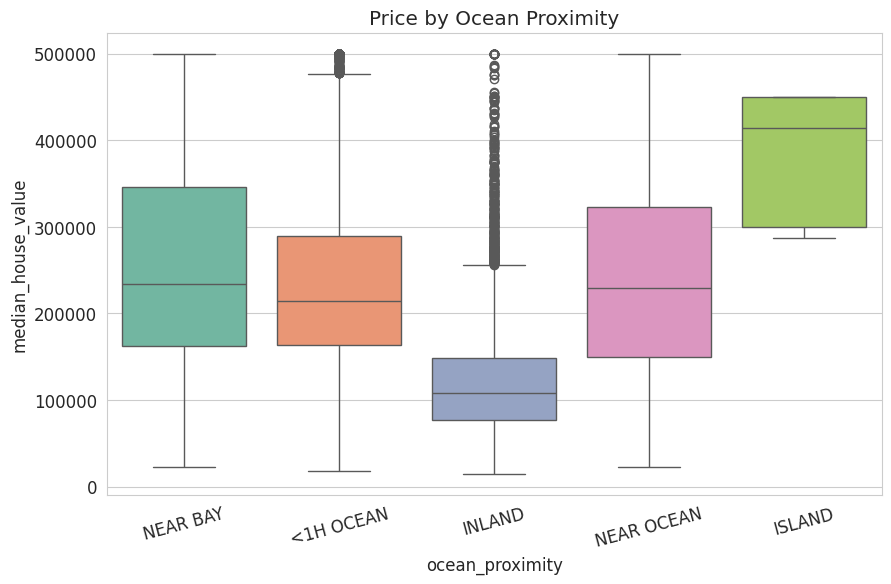

In [11]:
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', palette='Set2')
plt.title('Price by Ocean Proximity')
plt.xticks(rotation=15)
plt.show()

## Features Distribution...

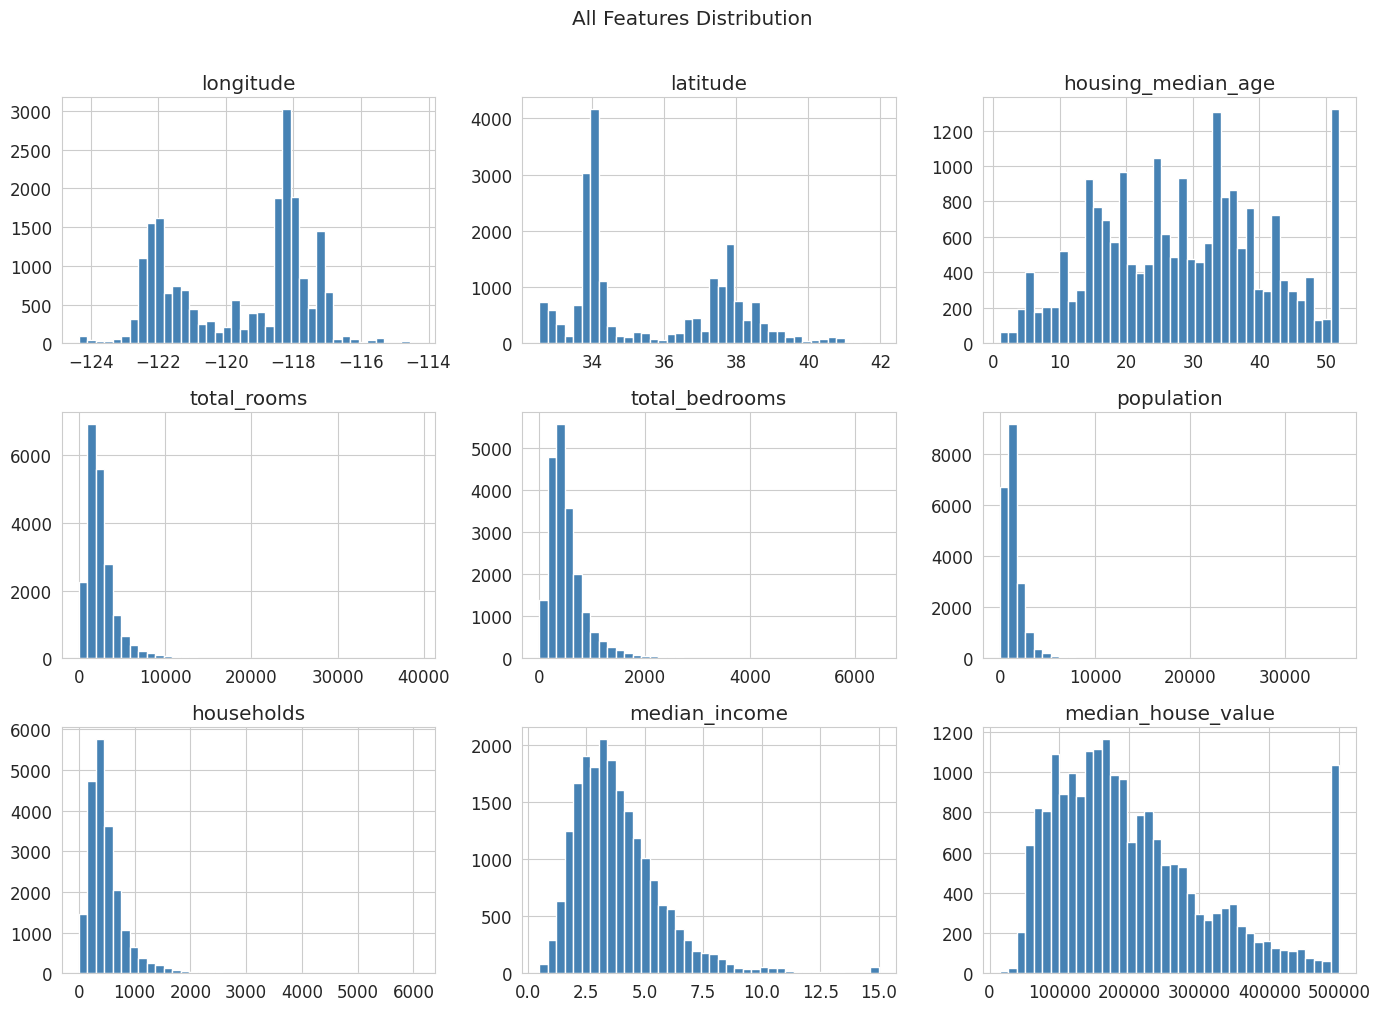

In [12]:
df.select_dtypes(include='number').hist(bins=40, figsize=(14, 10), color='steelblue', edgecolor='white')
plt.suptitle('All Features Distribution', y=1.01)
plt.tight_layout()
plt.show()

## HeatMap

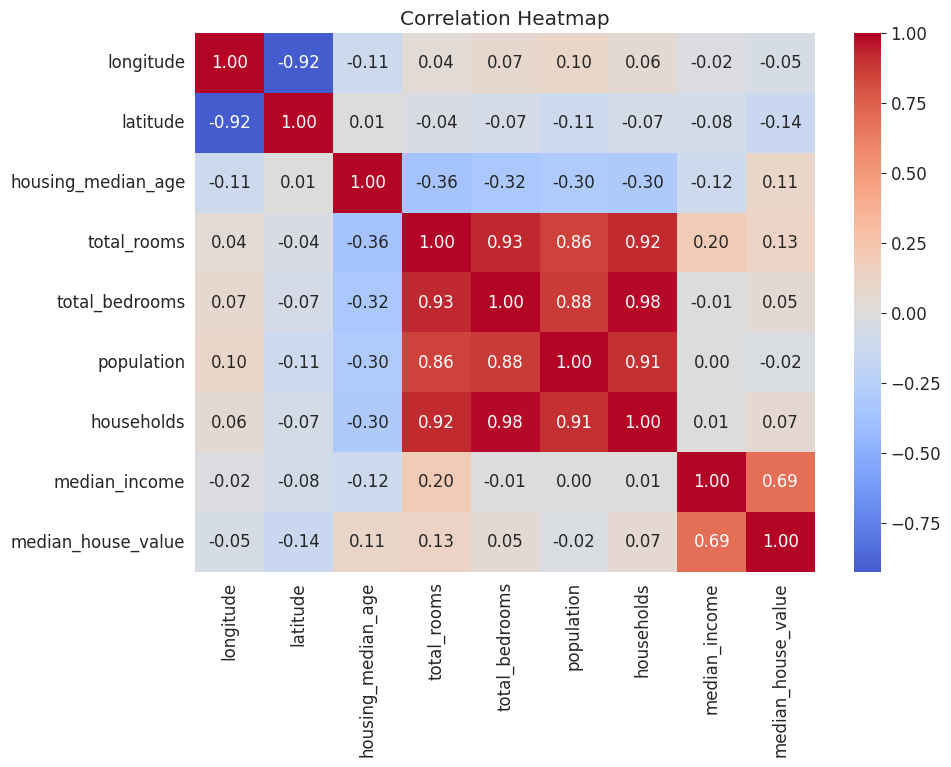

In [13]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Scatter Color bar

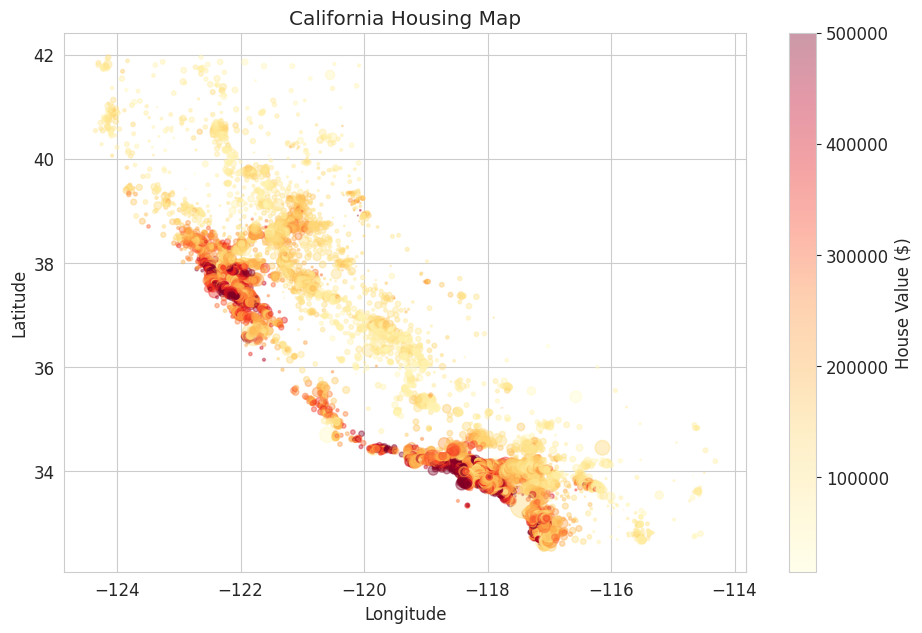

In [14]:
plt.figure(figsize=(11, 7))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'],
            cmap='YlOrRd', alpha=0.4, s=df['population']/100)
plt.colorbar(label='House Value ($)')
plt.title('California Housing Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Scatter PLot

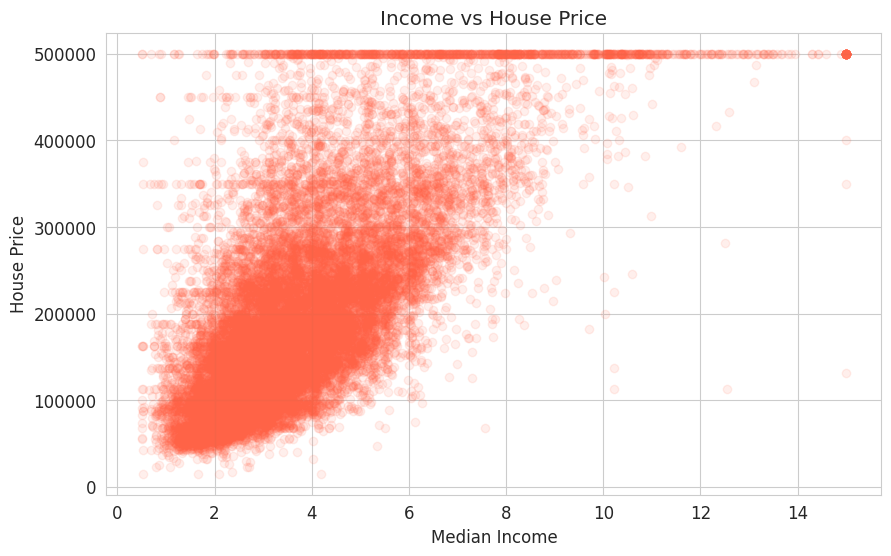

In [15]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.1, color='tomato')
plt.title('Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

## Preprocess the Data.....

In [16]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

/tmp/ipython-input-1590527289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [17]:
df['rooms_per_household']      = df['total_rooms']    / df['households']
df['bedrooms_per_room']        = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population']     / df['households']

In [18]:
df = pd.get_dummies(df, columns=['ocean_proximity'])

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Train Models

In [21]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [22]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## Evaluate Models

In [23]:
results = pd.DataFrame({
    'Model' : ['Linear Regression', 'Random Forest'],
    'MAE'   : [mean_absolute_error(y_test, lr_pred),          mean_absolute_error(y_test, rf_pred)],
    'RMSE'  : [np.sqrt(mean_squared_error(y_test, lr_pred)),  np.sqrt(mean_squared_error(y_test, rf_pred))],
    'R2'    : [r2_score(y_test, lr_pred),                     r2_score(y_test, rf_pred)]
}).set_index('Model').round(2)

results

,MAE,RMSE,R2
Model,,,
Linear Regression,50888.66,72668.54,0.60
Random Forest,32338.27,50382.99,0.81


# MAE, RMSE, R2 for Linear Regression and Random forest...

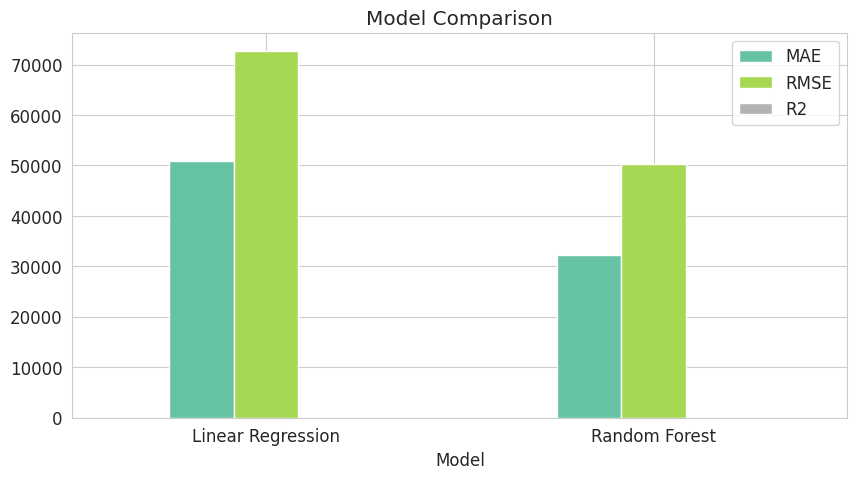

In [24]:
results[['MAE','RMSE','R2']].plot(kind='bar', figsize=(10,5), colormap='Set2', edgecolor='white')
plt.title('Model Comparison')
plt.xticks(rotation=0)
plt.show()

# Linear Regression vs Random Forest...

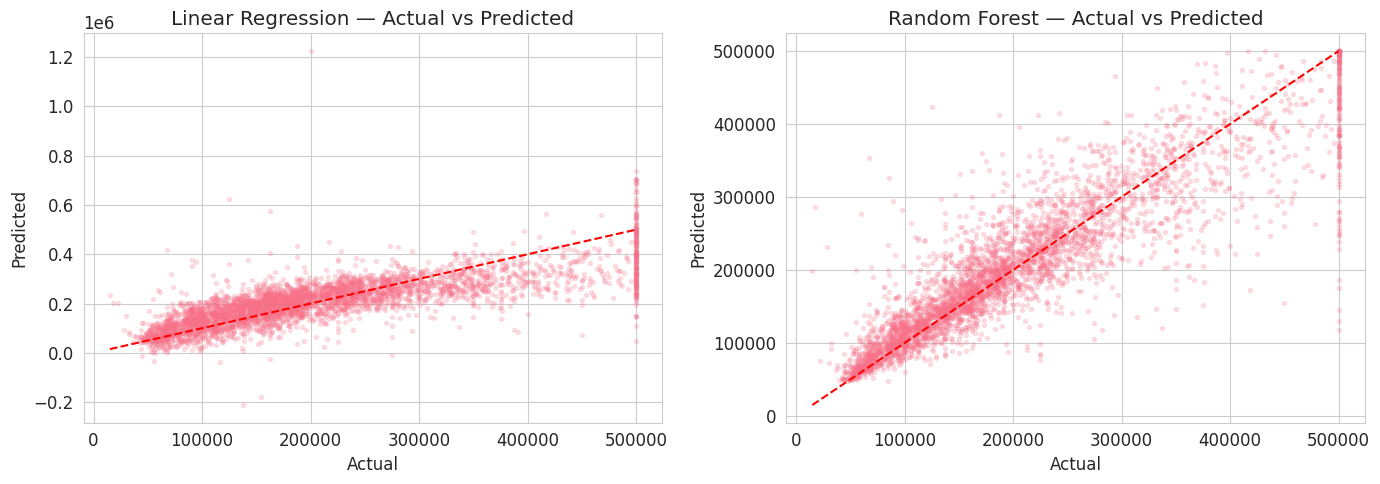

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, pred, title in zip(axes, [lr_pred, rf_pred], ['Linear Regression', 'Random Forest']):
    ax.scatter(y_test, pred, alpha=0.2, s=8)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(f'{title} — Actual vs Predicted')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Here i am  showing Features Importances

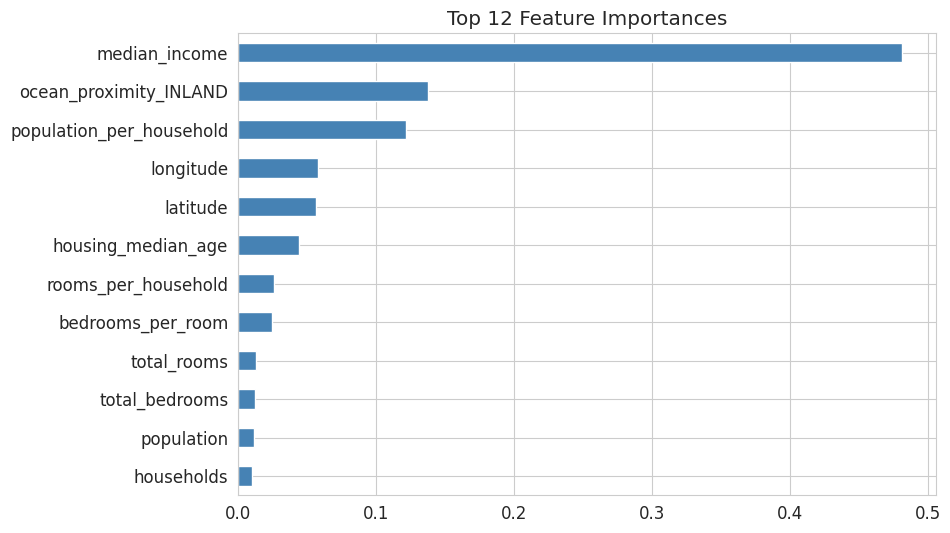

In [26]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

feat_imp.tail(12).plot(kind='barh', figsize=(9, 6), color='steelblue')
plt.title('Top 12 Feature Importances')
plt.show()